In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from fbprophet import Prophet

import warnings
warnings.filterwarnings('ignore') # 計算警告を非表示

In [2]:
df = pd.read_csv('Bitcoin.csv', thousands=',')
df.head() # DataFrame先頭5行

,日付け,終値,始値,高値,安値,出来高,前日比%
0,2019年06月29日,11815.7,12408.0,12422.9,11490.8,929.30K,-4.78%
1,2019年06月28日,12409.1,11288.4,12461.8,10970.5,1.09M,9.93%
2,2019年06月27日,11287.8,13062.4,13422.0,10493.5,1.59M,-13.59%
3,2019年06月26日,13063.8,11811.6,13929.8,11747.3,1.48M,10.62%
4,2019年06月25日,11809.9,11046.6,11833.9,11033.7,781.09K,6.91%


In [3]:
df = df.iloc[::-1]
df.head() # DataFrame先頭5行

,日付け,終値,始値,高値,安値,出来高,前日比%
1461,2015年06月29日,257.0,248.9,257.5,248.0,92.64K,3.25%
1460,2015年06月30日,264.1,257.0,268.7,255.4,116.53K,2.78%
1459,2015年07月01日,257.6,264.1,265.0,254.4,66.94K,-2.46%
1458,2015年07月02日,254.9,257.6,261.3,253.1,45.01K,-1.06%
1457,2015年07月03日,255.4,254.9,256.7,252.4,36.58K,0.20%


In [4]:
y = pd.Series(df['終値'], dtype='float')
ds = pd.to_datetime(df['日付け'], format = '%Y年%m月%d日')

df = pd.DataFrame({'ds': ds, 'y': y})
df.head()

,ds,y
1461,2015-06-29,257.0
1460,2015-06-30,264.1
1459,2015-07-01,257.6
1458,2015-07-02,254.9
1457,2015-07-03,255.4


In [5]:
m = Prophet()
m.fit(df)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [6]:
future = m.make_future_dataframe(periods=180)
future.tail()

,ds
1637,2019-12-22
1638,2019-12-23
1639,2019-12-24
1640,2019-12-25
1641,2019-12-26


In [7]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
1637,2019-12-22,7757.268918,4635.271782,10902.211472
1638,2019-12-23,7735.669887,4632.649094,10650.882751
1639,2019-12-24,7702.873976,4573.422271,10934.055791
1640,2019-12-25,7662.674977,4226.057651,10788.906572
1641,2019-12-26,7608.546300,4338.584873,10604.586745


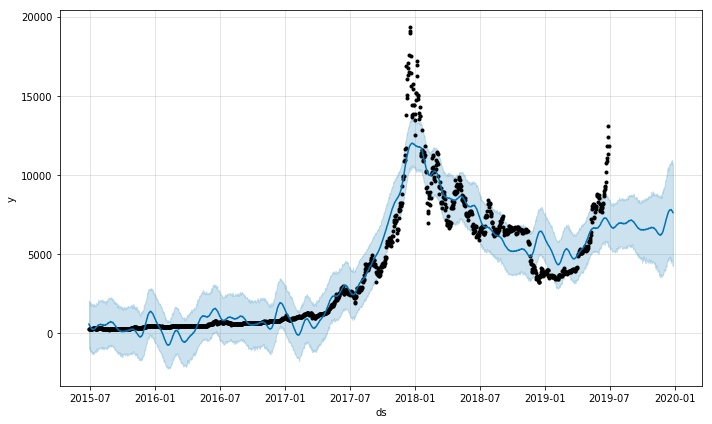

In [8]:
fig = m.plot(forecast)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


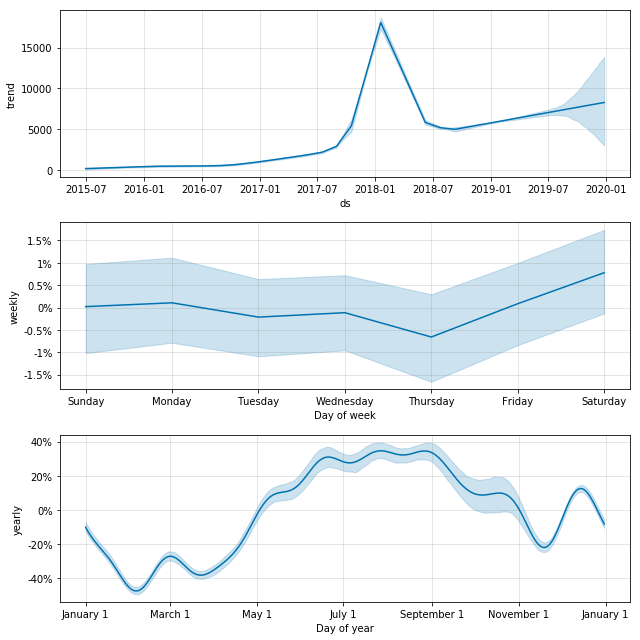

In [9]:
m = Prophet(seasonality_mode='multiplicative', mcmc_samples=100).fit(df)
fcst = m.predict(future)
fig = m.plot_components(fcst)